In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt

A matrix can act as a derivative operator over a variable of finite differences
to give an example where x is a vector made up of discrete values over a range and y is sin of x
D*y = y' and D is a matrix. In the easiest case we will just take an approximate derivative by calculating
the linear slope between each point and returning a vector

In [2]:
N = 25
x = np.linspace(-np.pi,np.pi,N)#N points between -pi and pi
dx = x[1]-x[0]
y = np.sin(x)

In [3]:
D = np.diag(np.ones(N-1),k=1) -np.identity(N) # a NXN matrix
D[-1][-1] = 1 #we have to fix the last row because we have been taking the slope between x_n, and x_n+1
D[-1][-2] = -1#now the last row does x_n and x_n-1
D = D/dx

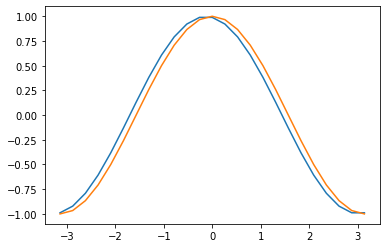

In [4]:
y_prime_approx = np.matmul(D,y)
y_prime = np.cos(x)
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

The next level of improvement would be if we calculated the slope at x_n-1 ->x_n, and averaged it
with the slope at x_n+1 -> x_n. We won't be able to do this at the end points though

In [5]:
D = np.zeros((N,N))-np.diag(np.ones(N-1),k=-1) + np.diag(np.ones(N-1),k=1)
"""The end rows have 2 because this is only one dx apart and the rest of the points 
are 2 apart and we will be dividing the whole thing by 2dx"""
D[-1][-1] = 2
D[-1][-2] = -2
D[0][0] = -2
D[0][1] = 2
D /= 2*dx

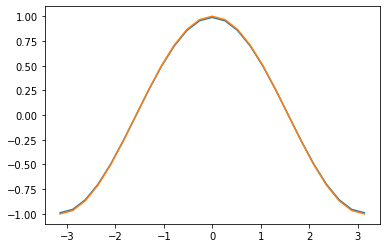

In [6]:
y_prime_approx = np.matmul(D,y)
y_prime = np.cos(x)
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

We can use the taylor series approx. to improve accuracy and generate the matrix D.<br>
A*f(x-dx)~ A*(f(x) - f'(x)*dx + f''(x)*dx^2/2 ....)<br>
B*f(x) = B*f(x)<br>
C*f(x+dx) ~ C*(f(x) + f'(x)*dx + f''(x)*dx^2/2 .....)<br>
f''(x) ~ (A+B+C)*fx + (C-A)f'(x) + (A+C)f''(x)<br>
A+B+C = 0<br>
C-A = 0<br>
A+C = 1 <br>
We can easily solve this system of equations to find our approximation of<br> 
f''(x) using the points x-dx,x, and x +dx<br>
but as you will see when we construct the end rows we could have used any points such as<br>
x,x+dx,d+2dx... and we could have solved for any order of derivative we chose

In [7]:
def find_operator(pnts,n_diff,dx):
    d = []
    for row in range(len(pnts)):
        tmp = [val**row/mth.factorial(row) for val in pnts]
        d.append(tmp[::])
    D = np.linalg.inv(np.array(d))
    x = np.zeros(len(pnts))
    x[n_diff] = 1
    return np.matmul(D,x)/dx**n_diff

In [8]:
row =find_operator([-1,0,1],2,dx)#this will produce a row of our 2nd derivative operator using  points -dx,x,dx
row

array([ 14.59025044, -29.18050089,  14.59025044])

In [9]:
row1 = find_operator([0,1,2,3],2,dx) #I am using a higher order approximation for these rows to reduce error
row_last = find_operator([-3,-2,-1,0],2,dx)

In [10]:
D = np.zeros((N,N)) + np.identity(N)*row[1] + np.diag(np.ones(N-1)*row[0],k=-1) + np.diag(np.ones(N-1)*row[2],k=1)
D[0][0:4] = row1
D[-1][-4:] = row_last


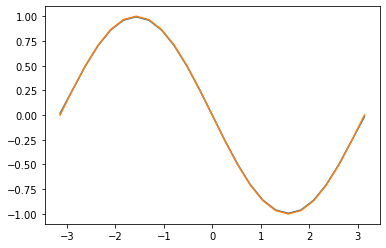

In [11]:
y_prime_approx = np.matmul(D,y)
y_prime = -np.sin(x) # this changed because we are doing 2nd derivative now
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

In [12]:
max(abs(y_prime-y_prime_approx))

0.017537578776604192

In [13]:
#goofing off now!
N = 100
x = np.linspace(-np.pi,np.pi,N)
dx = x[1]-x[0]
y = np.sin(x)
D = [] #this would not be very practical but just for fun let's make a full matrix, with highest order approx.
for i in range(N):
    D.append(find_operator([j for j in range(0-i,N-i)],2,dx))
D = np.array(D)

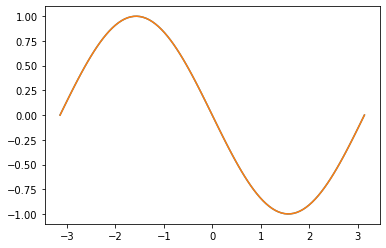

In [14]:
y_prime_approx = np.matmul(D,y)
y_prime = -np.sin(x)
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

max error is 3.576278685298791e-07


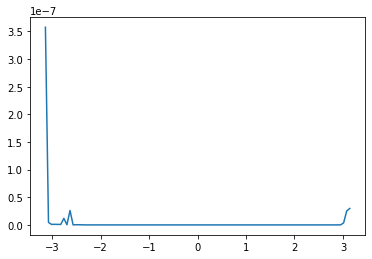

In [15]:
#let's see how close we got
err = abs(y_prime_approx-y_prime)#not using percent err to avoid divison by zero
print('max error is {}'.format(max(err)))
plt.plot(x,err)
plt.show()

In [16]:
D[0]

array([ 3.01307684e+03, -3.02944068e+04,  1.95649313e+05, -9.64143757e+05,
        3.76864648e+06, -1.19859423e+07,  3.16382091e+07, -7.03465814e+07,
        1.33185347e+08, -2.16337474e+08,  3.02938275e+08, -3.66544113e+08,
        3.83165530e+08, -3.45093400e+08,  2.66242489e+08, -1.74327757e+08,
        9.55977523e+07, -4.32215021e+07,  1.60009394e+07, -5.11025155e+06,
        1.74885291e+06, -7.77991410e+05,  3.44046872e+05, -1.02652785e+05,
        1.24319512e+04, -1.60597002e+03,  5.98487014e+03, -5.15358837e+03,
        2.07364296e+03, -3.91403473e+02,  1.17799561e+01, -4.51951436e+00,
        1.42926678e+01, -1.41544395e+01,  1.03594232e+01, -4.16679017e+00,
        1.48576323e-02,  7.71153186e-01, -2.77879658e-01, -1.50286007e-02,
        3.15607693e-02, -5.13189762e-03, -7.04799695e-04,  3.28435769e-04,
       -4.07558189e-04,  2.96439388e-04, -5.16782550e-05, -2.98925237e-05,
        1.60379003e-05, -2.22437611e-06, -1.96506525e-07,  8.55696945e-08,
       -4.66374748e-08,  